In [2]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import cv2

import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.colors import ListedColormap

import os
import SimpleITK  as sitk
import skimage.io as io
from networks.denseNet import DenseNet
from utils_wasserstein.utils import im2vec, vec2im, psnr
from utils_wasserstein.ot import sliced_wasserstein
from utils_wasserstein.tools import approach_by_wasserstein

from scipy import ndimage, misc
from scipy.ndimage import gaussian_filter

In [3]:
top = cm.get_cmap('viridis', 64)
bottom = cm.get_cmap('plasma', 960)
newcolors = np.vstack((top(np.linspace(0, 1, 64)),
                       bottom(np.linspace(1, 0, 960))))
newcmp = ListedColormap(newcolors, name='MonteCarlo')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


# Comparaison MSE et MAE 

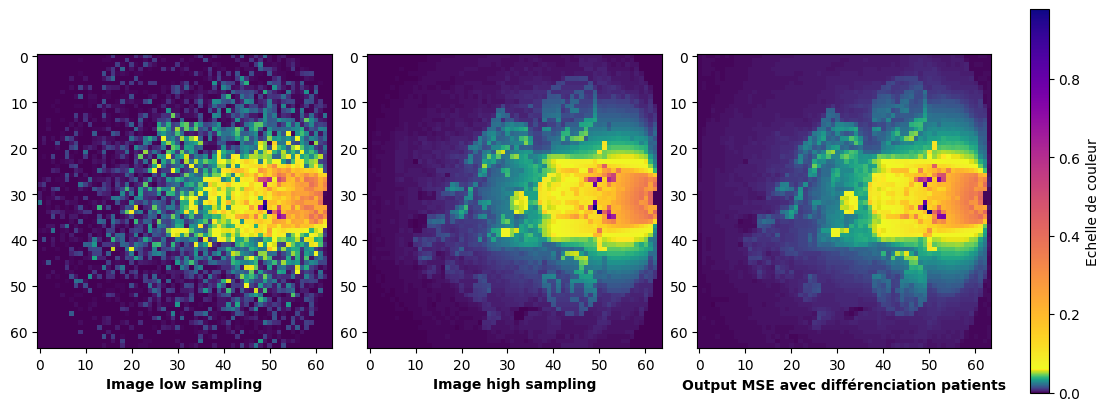

In [4]:
path = 'C:/Users/julien.heurtin/Documents/Stage_2A/Data_Medical/comparaison'

for num_image in range(150,151):
    
    reelImg = sitk.ReadImage(os.path.join(path, 'test_%03i_lbl.mhd' % num_image), imageIO='MetaImageIO')
    lbl = sitk.GetArrayFromImage(reelImg)

    inputImg = sitk.ReadImage(os.path.join(path, 'test_%03i_in.mhd' % num_image), imageIO='MetaImageIO')
    input = sitk.GetArrayFromImage(inputImg)
    
    outputImg_mse = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mse.mhd' % num_image), imageIO='MetaImageIO')
    output_mse = sitk.GetArrayFromImage(outputImg_mse)

    fig = plt.figure(constrained_layout=True, figsize=(11, 4))
    spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

    ax1 = fig.add_subplot(spec[0])
    plt.imshow(input, interpolation=None, cmap=newcmp)
    plt.xlabel('Image low sampling',fontweight='bold')

    ax2 = fig.add_subplot(spec[1])
    plt.imshow(lbl, interpolation=None, cmap=newcmp)
    plt.xlabel('Image high sampling',fontweight='bold')

    ax3 = fig.add_subplot(spec[2])
    plt.imshow(output_mse, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MSE avec différenciation patients',fontweight='bold')

    cbar = fig.colorbar(ax3.imshow(output_mse, interpolation=None, cmap=newcmp), ax=[ax1, ax2, ax3], fraction=0.046, pad=0.04)
    cbar.set_label('Echelle de couleur')

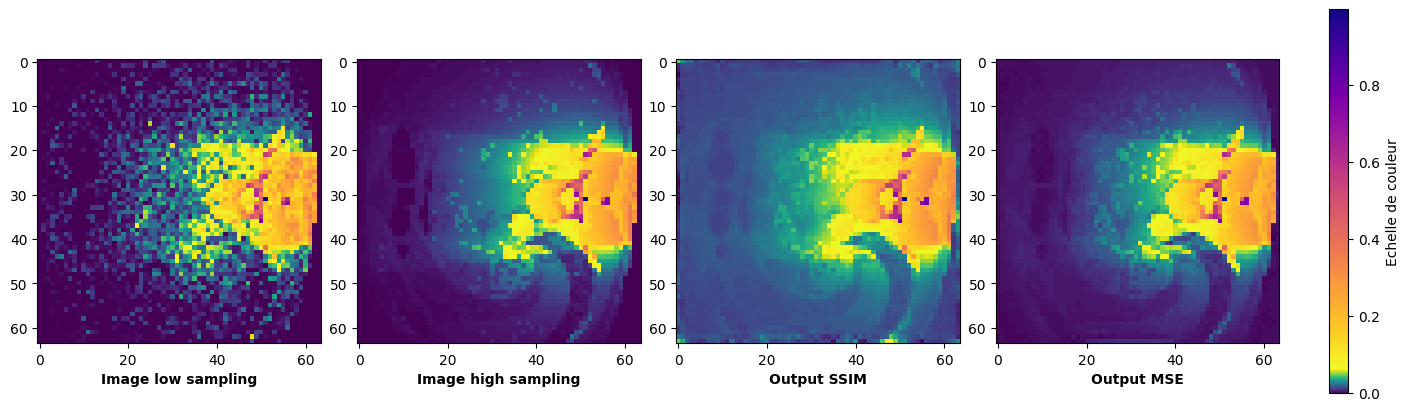

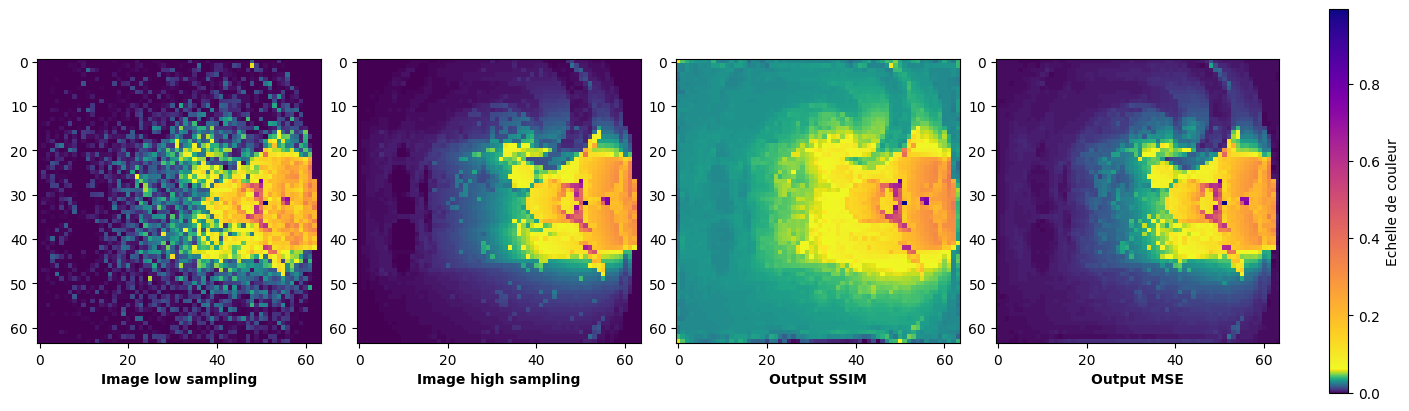

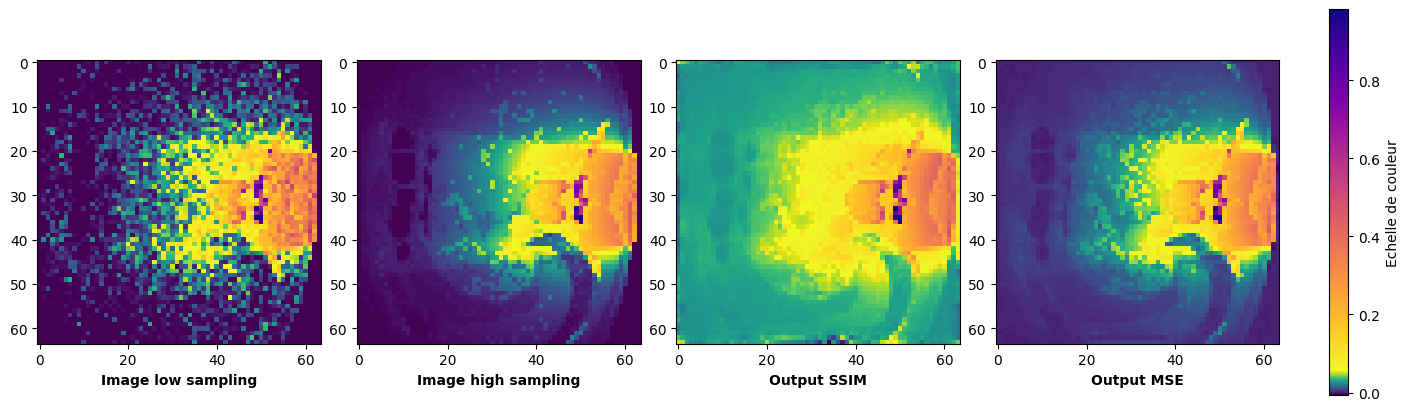

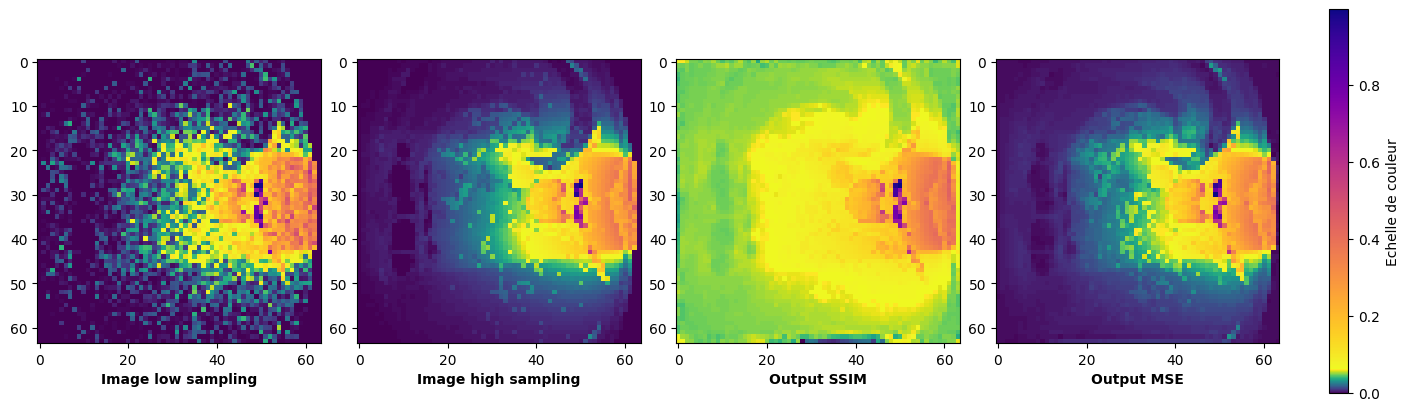

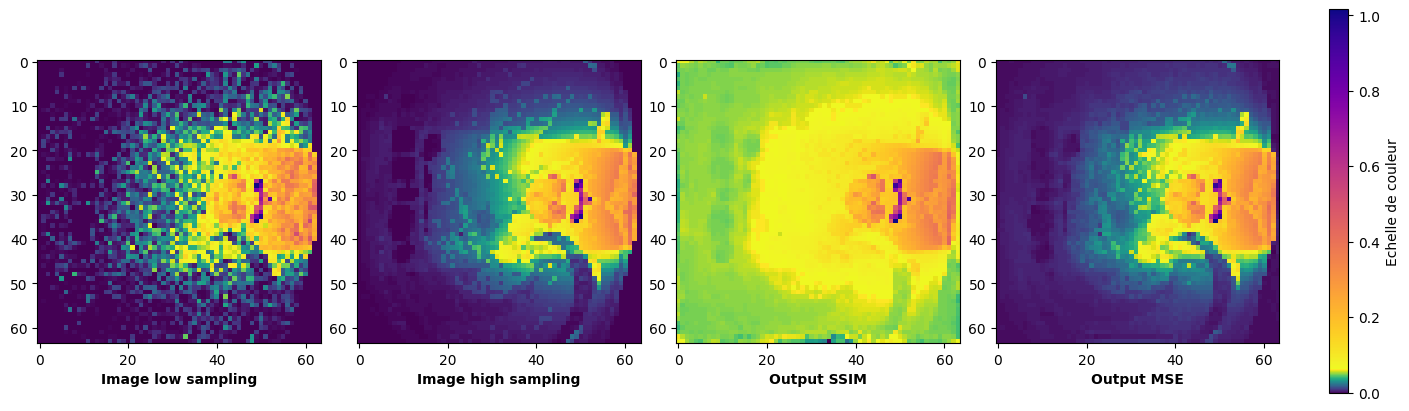

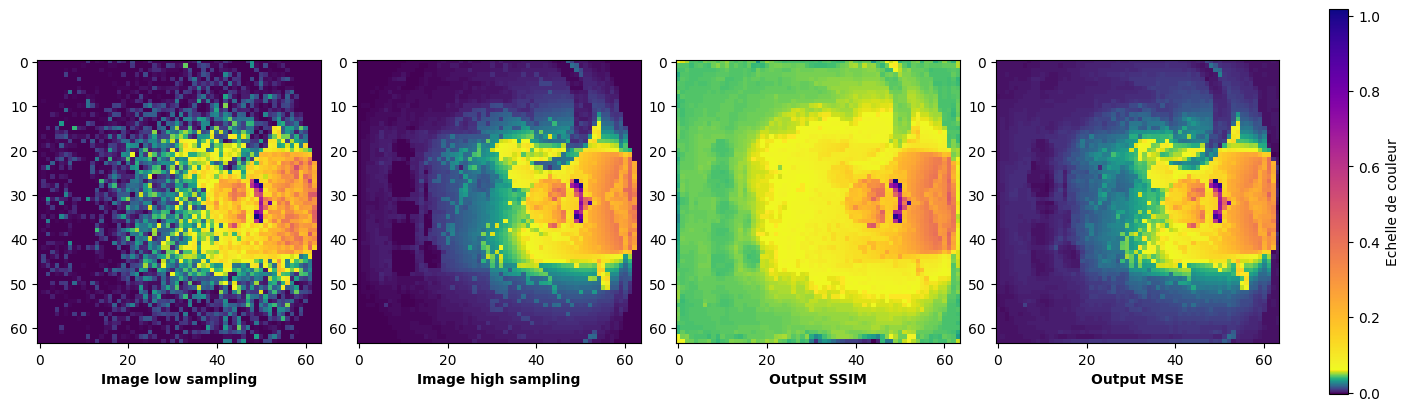

In [12]:
path = 'C:/Users/julien.heurtin/Documents/Stage_2A/Data_Medical/comparaison'

for num_image in range(10):
    
    reelImg = sitk.ReadImage(os.path.join(path, 'test_%03i_lbl.mhd' % num_image), imageIO='MetaImageIO')
    lbl = sitk.GetArrayFromImage(reelImg)

    inputImg = sitk.ReadImage(os.path.join(path, 'test_%03i_in.mhd' % num_image), imageIO='MetaImageIO')
    input = sitk.GetArrayFromImage(inputImg)

    outputImgSSIM = sitk.ReadImage(os.path.join(path, 'test_%03i_out_ssim.mhd' % num_image), imageIO='MetaImageIO')
    output_ssim = sitk.GetArrayFromImage(outputImgSSIM)
    
    outputImg_mse = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mse.mhd' % num_image), imageIO='MetaImageIO')
    output_mse = sitk.GetArrayFromImage(outputImg_mse)

    fig = plt.figure(constrained_layout=True, figsize=(14, 4))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)

    ax1 = fig.add_subplot(spec[0])
    plt.imshow(input, interpolation=None, cmap=newcmp)
    plt.xlabel('Image low sampling',fontweight='bold')

    ax2 = fig.add_subplot(spec[1])
    plt.imshow(lbl, interpolation=None, cmap=newcmp)
    plt.xlabel('Image high sampling',fontweight='bold')

    ax3 = fig.add_subplot(spec[2])
    plt.imshow(output_ssim, interpolation=None, cmap=newcmp)
    plt.xlabel('Output SSIM',fontweight='bold')

    ax4 = fig.add_subplot(spec[3])
    plt.imshow(output_mse, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MSE',fontweight='bold')

    cbar = fig.colorbar(ax4.imshow(output_mse, interpolation=None, cmap=newcmp), ax=[ax1, ax2, ax3, ax4], fraction=0.046, pad=0.04)
    cbar.set_label('Echelle de couleur')

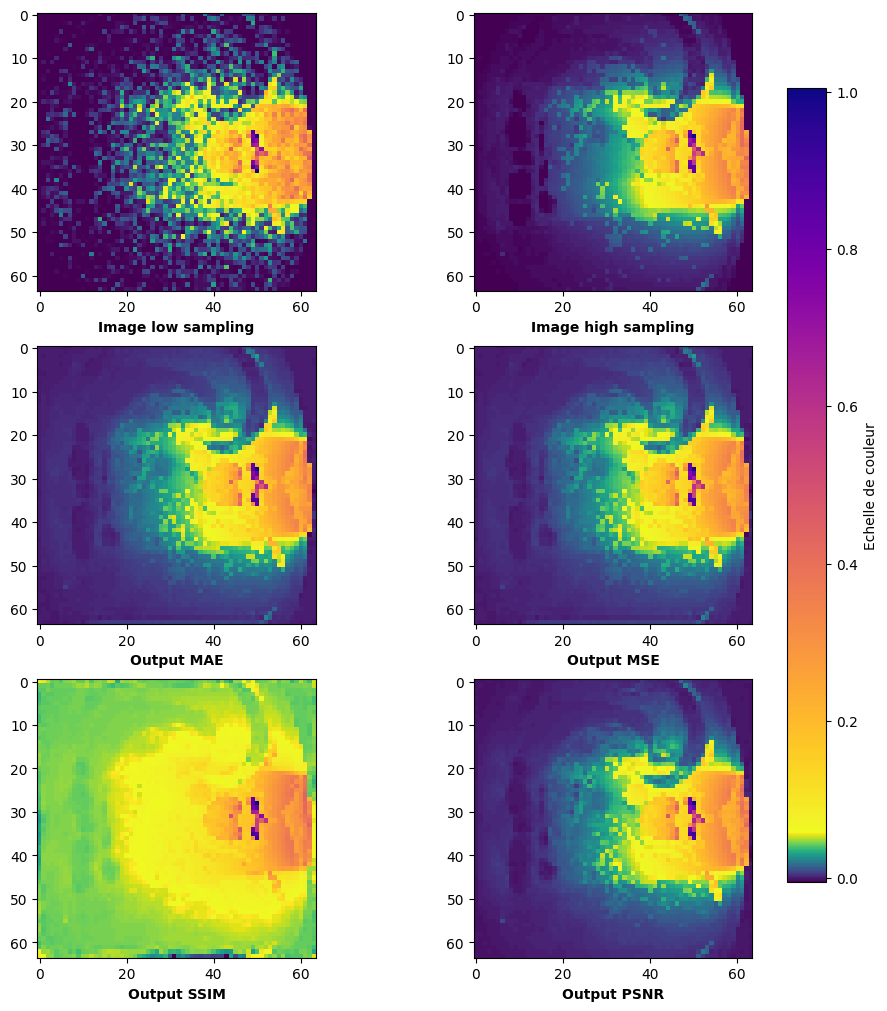

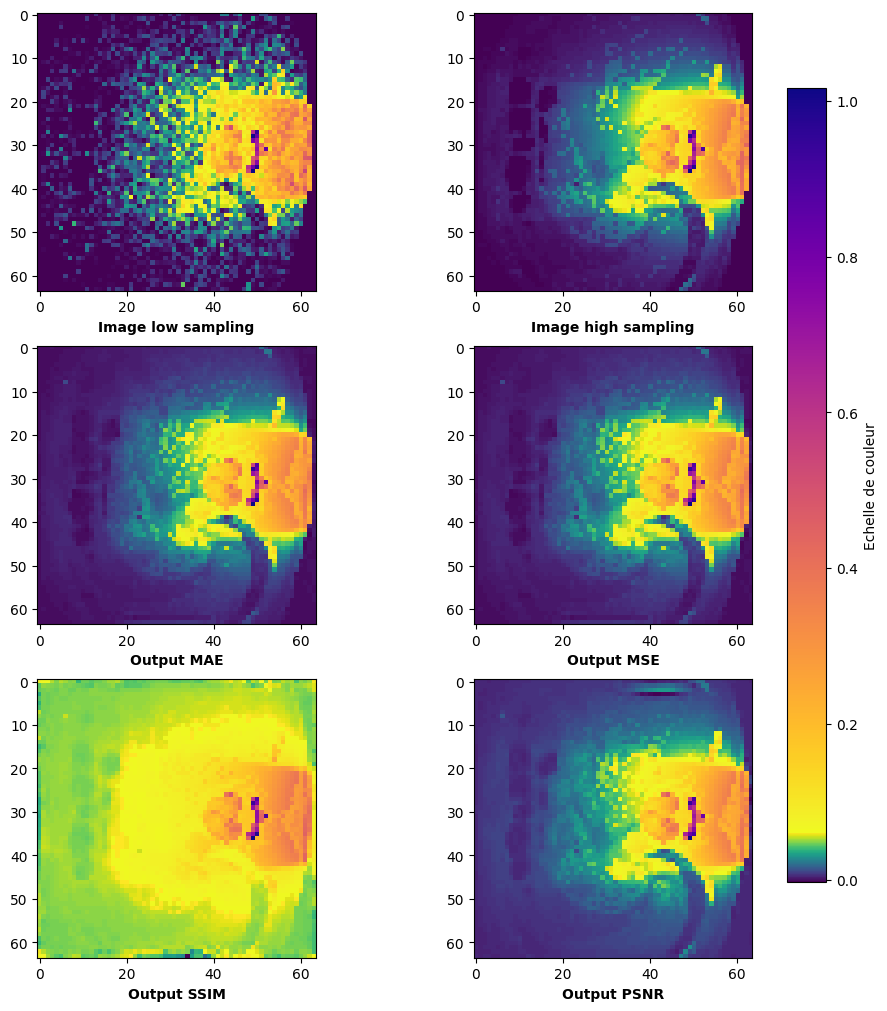

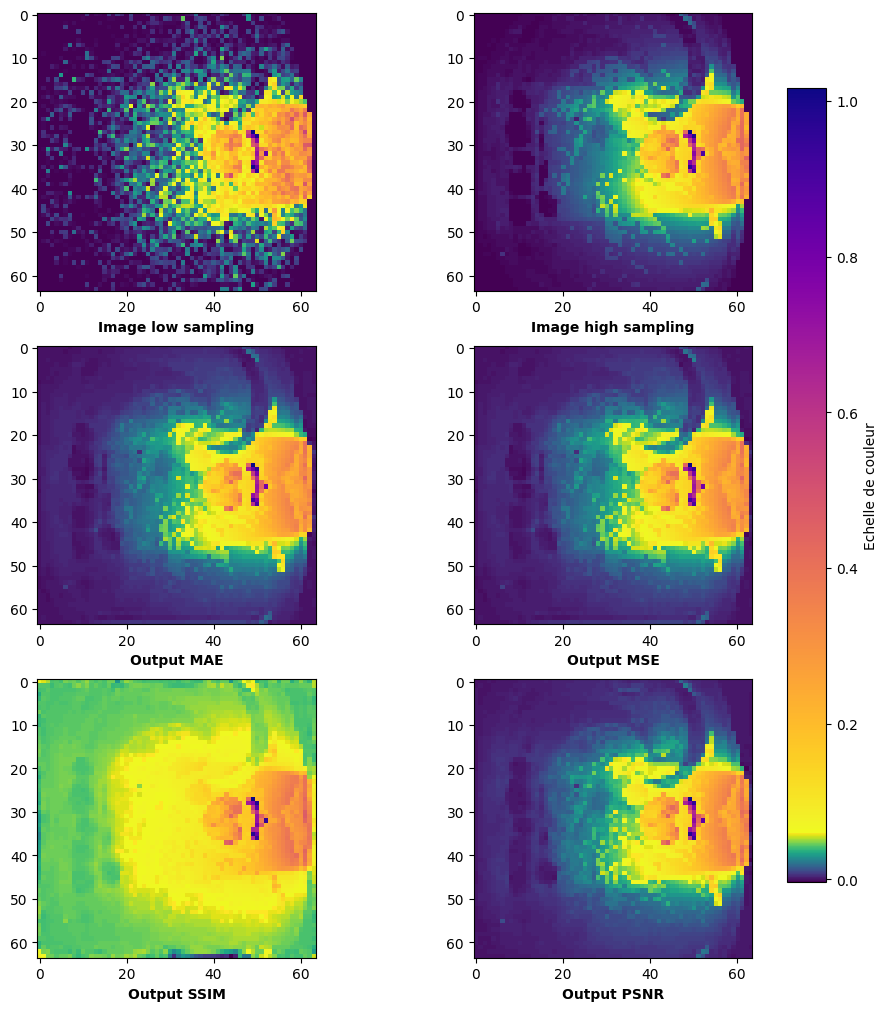

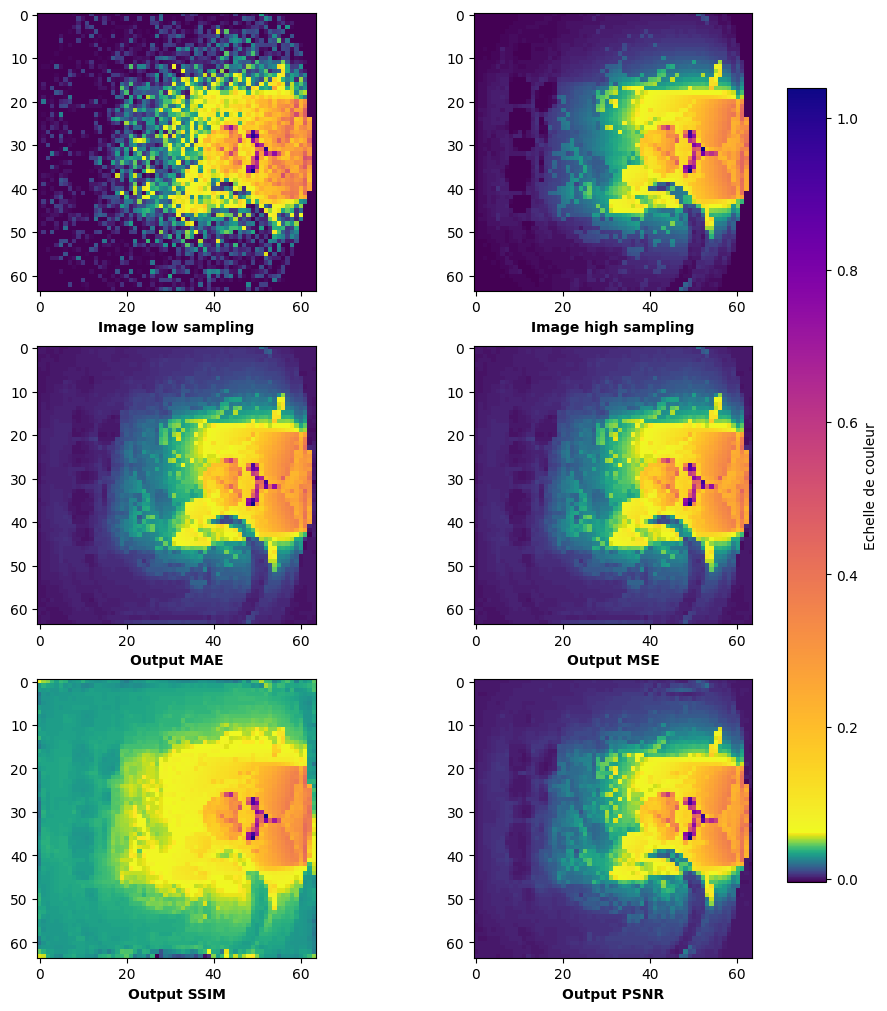

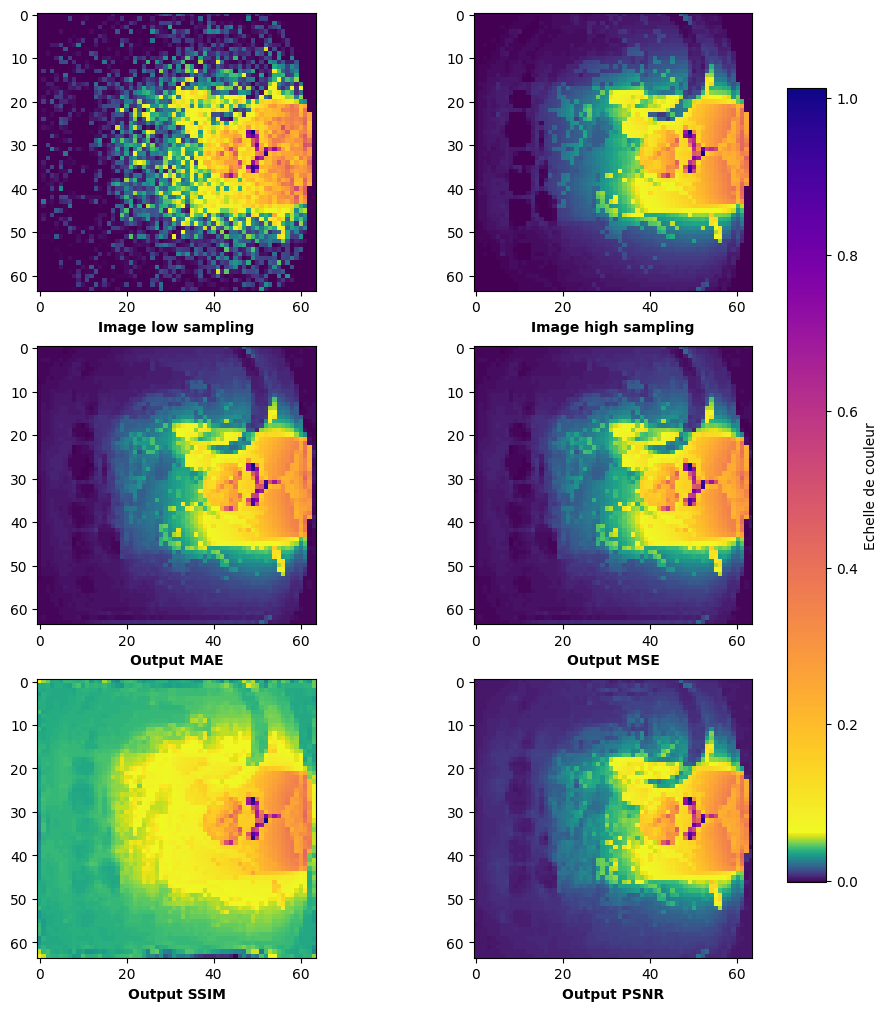

In [15]:
path = 'C:/Users/julien.heurtin/Documents/Stage_2A/Data_Medical/comparaison'

testFilenames = np.load("./donnees_test_exclusion_patient/testFilenames.npy", allow_pickle=True)
testFilenames = list(testFilenames)

for num_image in range(5,10):
    

    reelImg = sitk.ReadImage(os.path.join(path, 'test_%03i_lbl.mhd' % num_image), imageIO='MetaImageIO')
    lbl = sitk.GetArrayFromImage(reelImg)

    inputImg = sitk.ReadImage(os.path.join(path, 'test_%03i_in.mhd' % num_image), imageIO='MetaImageIO')
    input = sitk.GetArrayFromImage(inputImg)

    outputImg_mae = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mae.mhd' % num_image), imageIO='MetaImageIO')
    output_mae = sitk.GetArrayFromImage(outputImg_mae)
    
    outputImg_mse = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mse.mhd' % num_image), imageIO='MetaImageIO')
    output_mse = sitk.GetArrayFromImage(outputImg_mse)
    
    outputImgSSIM = sitk.ReadImage(os.path.join(path, 'test_%03i_out_ssim.mhd' % num_image), imageIO='MetaImageIO')
    output_ssim = sitk.GetArrayFromImage(outputImgSSIM)
    
    outputImgPSNR = sitk.ReadImage(os.path.join(path, 'test_%03i_out_psnr.mhd' % num_image), imageIO='MetaImageIO')
    output_psnr = sitk.GetArrayFromImage(outputImgPSNR)

    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

    ax1 = fig.add_subplot(spec[0])
    plt.imshow(input, interpolation=None, cmap=newcmp)
    plt.xlabel('Image low sampling',fontweight='bold')

    ax2 = fig.add_subplot(spec[1])
    plt.imshow(lbl, interpolation=None, cmap=newcmp)
    plt.xlabel('Image high sampling',fontweight='bold')

    ax3 = fig.add_subplot(spec[2])
    plt.imshow(output_mae, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MAE',fontweight='bold')

    ax4 = fig.add_subplot(spec[3])
    plt.imshow(output_mse, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MSE',fontweight='bold')
    
    ax5 = fig.add_subplot(spec[4])
    plt.imshow(output_ssim, interpolation=None, cmap=newcmp)
    plt.xlabel('Output SSIM',fontweight='bold')

    ax6 = fig.add_subplot(spec[5])
    plt.imshow(output_psnr, interpolation=None, cmap=newcmp)
    plt.xlabel('Output PSNR',fontweight='bold')

    cbar = fig.colorbar(ax3.imshow(output_mse, interpolation=None, cmap=newcmp), ax=[ax1, ax2, ax3, ax4, ax5, ax6], fraction=0.046, pad=0.04)
    cbar.set_label('Echelle de couleur')
    

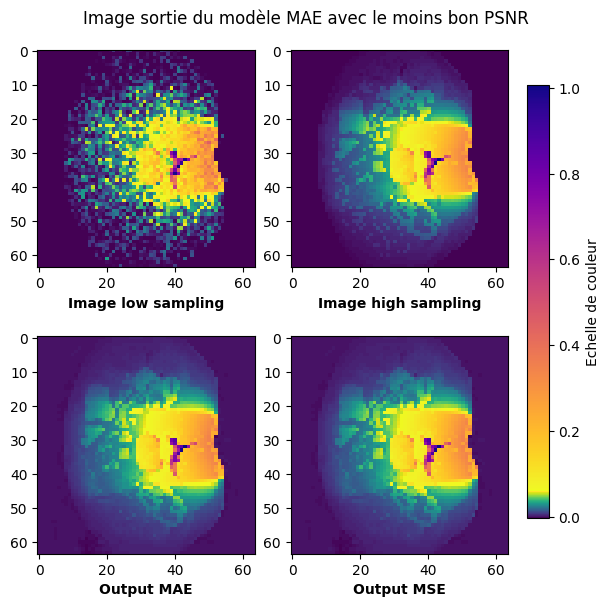

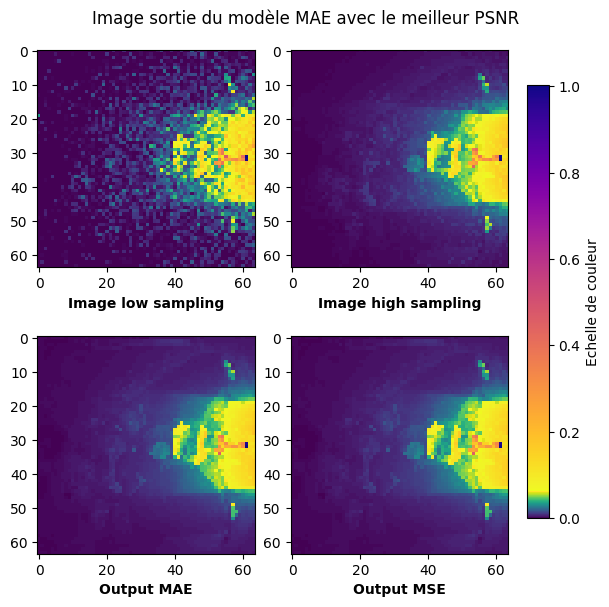

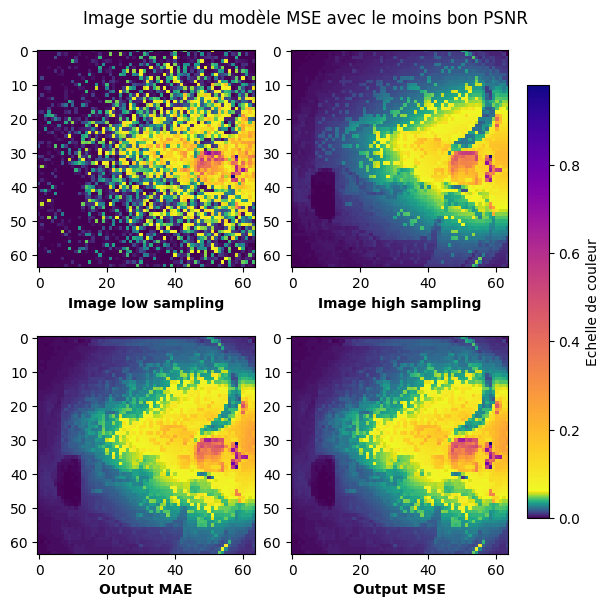

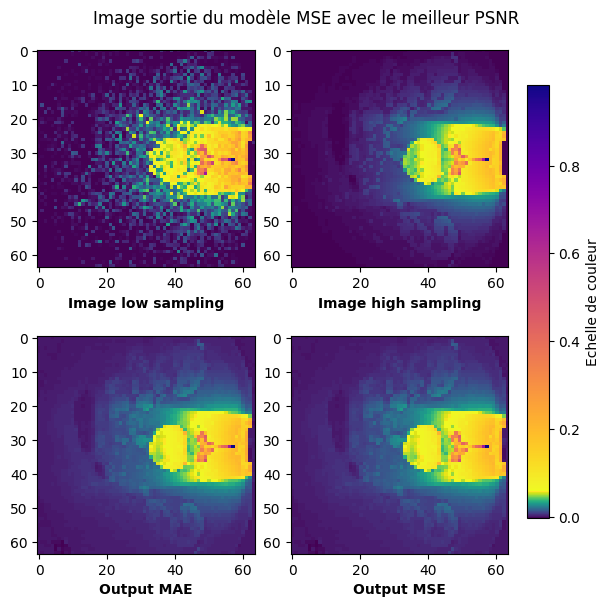

In [11]:
path = 'C:/Users/julien.heurtin/Documents/Stage_2A/Data_Medical/comparaison'

list_images = []
list_images.append(np.argmin(PSNR_out_mae_lbl))
list_images.append(np.argmax(PSNR_out_mae_lbl))
list_images.append(np.argmin(PSNR_out_mse_lbl))
list_images.append(np.argmax(PSNR_out_mse_lbl))
list_titres = ["Image sortie du modèle MAE avec le moins bon PSNR", "Image sortie du modèle MAE avec le meilleur PSNR",  
               "Image sortie du modèle MSE avec le moins bon PSNR",
               "Image sortie du modèle MSE avec le meilleur PSNR"]
list_boucle =[]
list_boucle.append(list_images)
list_boucle.append(list_titres)


for i in range(len(list_images)):
    
    num_image = list_boucle[0][i]
    titre = list_boucle[1][i]

    reelImg = sitk.ReadImage(os.path.join(path, 'test_%03i_lbl.mhd' % num_image), imageIO='MetaImageIO')
    lbl = sitk.GetArrayFromImage(reelImg)

    inputImg = sitk.ReadImage(os.path.join(path, 'test_%03i_in.mhd' % num_image), imageIO='MetaImageIO')
    input = sitk.GetArrayFromImage(inputImg)

    outputImg_mae = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mae.mhd' % num_image), imageIO='MetaImageIO')
    output_mae = sitk.GetArrayFromImage(outputImg_mae)
    
    outputImg_mse = sitk.ReadImage(os.path.join(path, 'test_%03i_out_mse.mhd' % num_image), imageIO='MetaImageIO')
    output_mse = sitk.GetArrayFromImage(outputImg_mse)

    fig = plt.figure(constrained_layout=True, figsize=(6, 6))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig.suptitle(titre)

    ax1 = fig.add_subplot(spec[0])
    plt.imshow(input, interpolation=None, cmap=newcmp)
    plt.xlabel('Image low sampling',fontweight='bold')

    ax2 = fig.add_subplot(spec[1])
    plt.imshow(lbl, interpolation=None, cmap=newcmp)
    plt.xlabel('Image high sampling',fontweight='bold')

    ax3 = fig.add_subplot(spec[2])
    plt.imshow(output_mae, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MAE',fontweight='bold')

    ax4 = fig.add_subplot(spec[3])
    plt.imshow(output_mse, interpolation=None, cmap=newcmp)
    plt.xlabel('Output MSE',fontweight='bold')

    cbar = fig.colorbar(ax3.imshow(output_mse, interpolation=None, cmap=newcmp), ax=[ax1, ax2, ax3], fraction=0.046, pad=0.04)
    cbar.set_label('Echelle de couleur')
    